In [1]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
file_path = "m4_survey_data.sqlite"

In [4]:
# Download the file
response = requests.get(url)
with open(file_path, "wb") as file:
    file.write(response.content)

print("File downloaded successfully")

File downloaded successfully


In [5]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [6]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
for table in tables:
    print(table[0])

EduOther
DevType
LastInt
JobFactors
WorkPlan
WorkChallenge
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear
PlatformWorkedWith
PlatformDesireNextYear
WebFrameWorkedWith
WebFrameDesireNextYear
MiscTechWorkedWith
MiscTechDesireNextYear
DevEnviron
Containers
SOVisitTo
SONewContent
Gender
Sexuality
Ethnicity
master


In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
QUERY = """
SELECT B1.Respondent, B1.LanguageWorkedWith, Count(B1.LanguageWorkedWith), B2.ConvertedComp
FROM LanguageWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
GROUP BY B1.LanguageWorkedWith
Order by Count(B1.LanguageWorkedWith) DESC
"""
data = pd.read_sql(QUERY, conn)
data.head(10)

,Respondent,LanguageWorkedWith,Count(B1.LanguageWorkedWith),ConvertedComp
0,9,JavaScript,8687,95179.0
1,9,HTML/CSS,7830,95179.0
2,4,SQL,7106,61000.0
3,9,Bash/Shell/PowerShell,4642,95179.0
4,4,Python,4542,61000.0
5,19,Java,4506,31140.0
6,4,C#,4288,61000.0
7,9,TypeScript,3232,95179.0
8,13,PHP,2913,90000.0
9,4,C++,1946,61000.0


In [67]:
QUERY = """
SELECT B1.Respondent, B1.LanguageWorkedWith, B2.ConvertedComp
FROM LanguageWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.LanguageWorkedWith = "JavaScript"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(1938, 3)

In [63]:
QUERY = """
SELECT B1.Respondent, B1.LanguageWorkedWith, B2.ConvertedComp
FROM LanguageWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.LanguageWorkedWith = "HTML/CSS"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(1673, 3)

In [11]:
QUERY = """
SELECT B1.Respondent, B1.LanguageWorkedWith, B2.ConvertedComp
FROM LanguageWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.LanguageWorkedWith = "SQL"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(1564, 3)

In [12]:
QUERY = """
SELECT B1.Respondent, B1.LanguageWorkedWith, B2.ConvertedComp
FROM LanguageWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.LanguageWorkedWith = "Python"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(1160, 3)

In [13]:
QUERY = """
SELECT B1.Respondent, B1.LanguageWorkedWith, B2.ConvertedComp
FROM LanguageWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.LanguageWorkedWith = "Bash/Shell/PowerShell"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(1285, 3)

<AxesSubplot:>

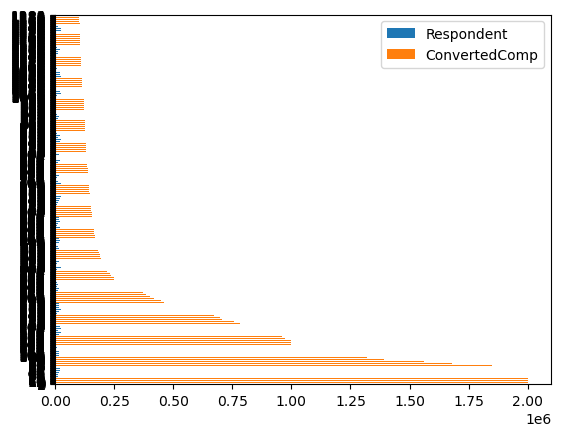

In [14]:
data.plot(kind='barh')

In [34]:
Top_5 = pd.DataFrame({'Language': ['JavaScript', 'HTML/CSS', 'SQL', 'Bash/Shell/PowerShell', 'Python'],
                      'Number of High Earners': [1938, 1673, 1564, 1285, 1160]})


print(Top_5)


                Language  Number of High Earners
0             JavaScript                    1938
1               HTML/CSS                    1673
2                    SQL                    1564
3  Bash/Shell/PowerShell                    1285
4                 Python                    1160


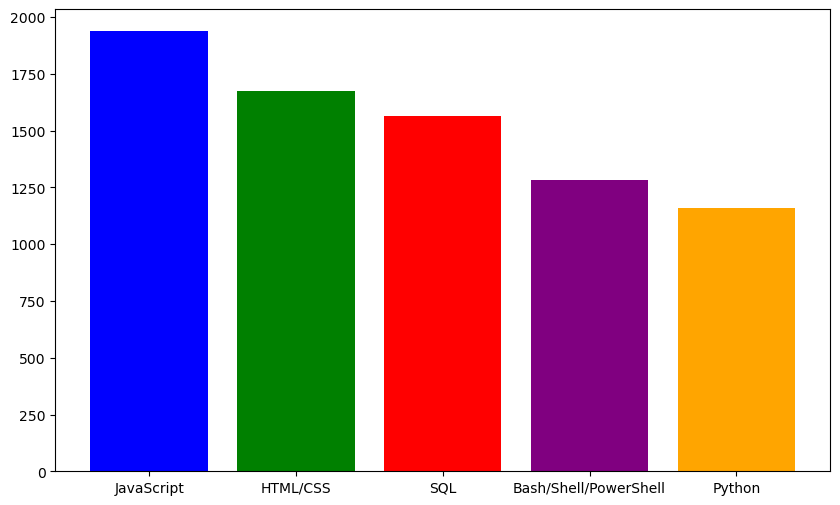

In [38]:
colors = ['blue', 'green', 'red', 'purple', 'orange']
plt.figure(figsize=(10,6))


bars = plt.bar(Top_5['Language'], Top_5['Number of High Earners'], color=colors)

plt.show()



In [55]:
QUERY = """
SELECT B1.Respondent, B1.DatabaseWorkedWith, COUNT(B1.DatabaseWorkedWith), B2.ConvertedComp
FROM DatabaseWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
GROUP BY B1.DatabaseWorkedWith
Order by Count(B1.DatabaseWorkedWith) DESC
"""
data = pd.read_sql(QUERY, conn)
data.head(10)

,Respondent,DatabaseWorkedWith,COUNT(B1.DatabaseWorkedWith),ConvertedComp
0,4,MySQL,5469,61000.0
1,16,Microsoft SQL Server,4110,455352.0
2,9,PostgreSQL,4097,95179.0
3,4,SQLite,3248,61000.0
4,16,MongoDB,3016,455352.0
5,22,Redis,2508,103000.0
6,20,Elasticsearch,1954,41244.0
7,22,Oracle,1744,103000.0
8,20,MariaDB,1709,41244.0
9,13,Firebase,1314,90000.0


Database

In [48]:
QUERY = """
SELECT B1.Respondent, B1.DatabaseWorkedWith, B2.ConvertedComp
FROM DatabaseWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.DatabaseWorkedWith = "MySQL"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(1028, 3)

In [49]:
QUERY = """
SELECT B1.Respondent, B1.DatabaseWorkedWith, B2.ConvertedComp
FROM DatabaseWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.DatabaseWorkedWith = "Microsoft SQL Server"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(894, 3)

In [50]:
QUERY = """
SELECT B1.Respondent, B1.DatabaseWorkedWith, B2.ConvertedComp
FROM DatabaseWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.DatabaseWorkedWith = "PostgreSQL"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(994, 3)

In [51]:
QUERY = """
SELECT B1.Respondent, B1.DatabaseWorkedWith, B2.ConvertedComp
FROM DatabaseWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.DatabaseWorkedWith = "SQLite"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(624, 3)

In [52]:
QUERY = """
SELECT B1.Respondent, B1.DatabaseWorkedWith, B2.ConvertedComp
FROM DatabaseWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.DatabaseWorkedWith = "MongoDB"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(621, 3)

In [56]:
QUERY = """
SELECT B1.Respondent, B1.DatabaseWorkedWith, B2.ConvertedComp
FROM DatabaseWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.DatabaseWorkedWith = "Redis"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(727, 3)

In [57]:
QUERY = """
SELECT B1.Respondent, B1.DatabaseWorkedWith, B2.ConvertedComp
FROM DatabaseWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.DatabaseWorkedWith = "Oracle"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(302, 3)

In [58]:
QUERY = """
SELECT B1.Respondent, B1.DatabaseWorkedWith, B2.ConvertedComp
FROM DatabaseWorkedWith AS B1
JOIN master AS B2
ON B1.Respondent = B2.Respondent
WHERE B2.ConvertedComp > 100000 and B1.DatabaseWorkedWith = "Elasticsearch"
ORDER BY B2.ConvertedComp DESC
"""
data = pd.read_sql(QUERY, conn)
data.shape

(577, 3)

In [17]:
data = pd.read_csv('data_demographics.csv')

In [18]:
MySQL 1028
Microsoft SQL Server 894
PostgreSQL 994
SQLite 624
MongoDB 621
Redis 727

SyntaxError: cannot assign to operator (1066299926.py, line 2)

In [69]:
Top_D = pd.DataFrame({'Database': ['MySQL', 'PostgreSQL', 'Microsoft SQL Server', 'Redis', 'SQLite','MongoDB '],
                      'Number of High Earners': [1028, 994, 894, 727, 624,621]})


print(Top_D)

               Database  Number of High Earners
0                 MySQL                    1028
1            PostgreSQL                     994
2  Microsoft SQL Server                     894
3                 Redis                     727
4                SQLite                     624
5              MongoDB                      621


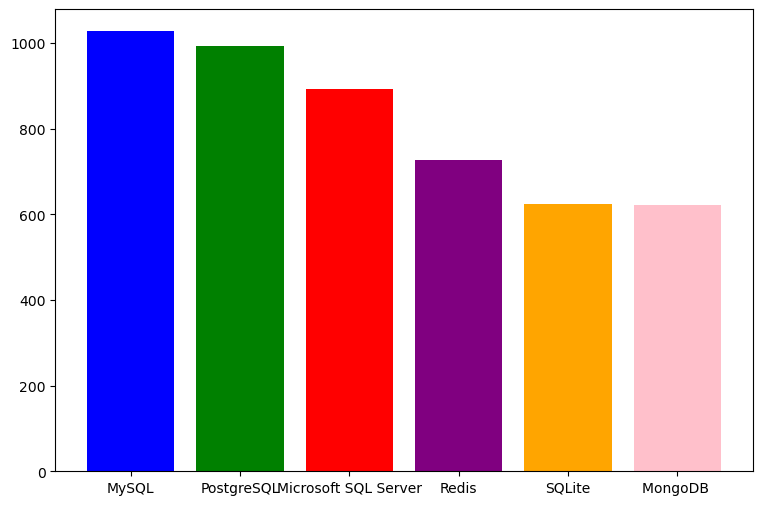

In [72]:
colors = ['blue', 'green', 'red', 'purple', 'orange','pink']
plt.figure(figsize=(9,6))


bars = plt.bar(Top_D['Database'], Top_D['Number of High Earners'], color=colors)

plt.show()


In [9]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'BetterLife',
       'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName',
       'SOVisit1st', 'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
       'SOComm', 'WelcomeChange', 'SONewContent', 'Age', 'Gender', 'Trans',
       'Sexuality', 'Ethnicity', 'Dependents', '

Variable Selection\
-EdLevel\
-UndergradMajor\
-DevType\
-YearsCode\
-Age\
-Gender

Visualization before defining "High earning developers"

Gender

In [10]:
data['Gender'].unique()

array(['Man', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming', nan,
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [11]:
no_null = data['Gender'].dropna(inplace=False)
no_null.isnull().sum()

0

In [12]:
gender_count= no_null.value_counts()
gender_count

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

<AxesSubplot:>

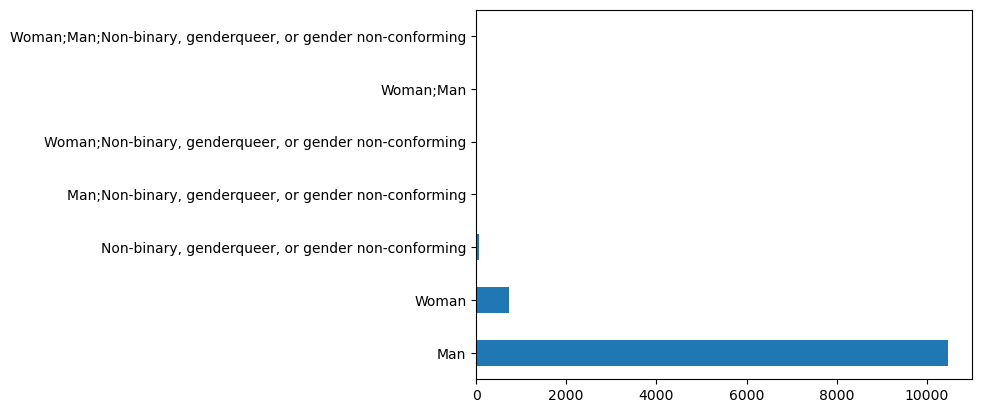

In [13]:
gender_count.plot(kind='barh')

In [75]:
filtered_no_null = no_null[no_null.isin(['Man', 'Woman'])]
filtered_no_null.value_counts()

Man      10480
Woman      731
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

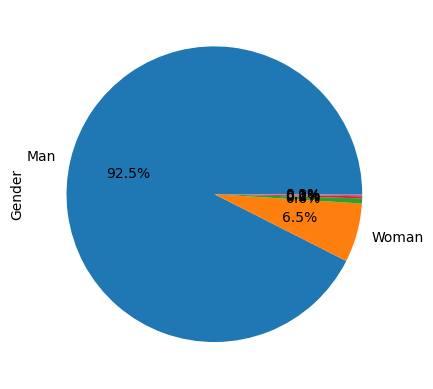

In [86]:
labels = ['Man', 'Woman','','','','','']

gender_count.plot(kind='pie',labels=labels,
                 autopct='%1.1f%%')

In [ ]:
#92.5 percent are Man

Age

In [93]:
data['Age'].isnull().sum()

287

In [88]:
data['Age'].max()

99.0

In [89]:
data['Age'].min()

16.0

In [90]:
data['Age'].mean()

30.779137791377913

In [91]:
data['Age'].mode()

0    28.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

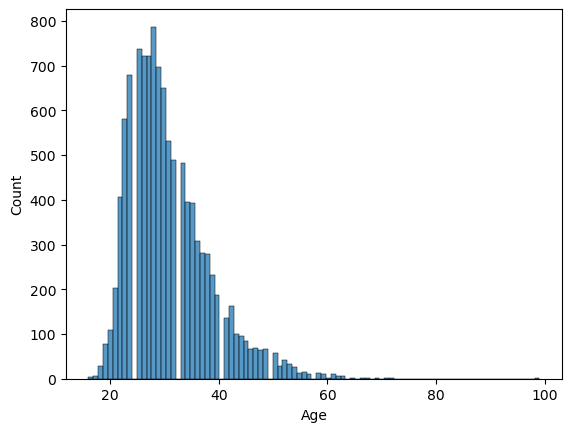

In [92]:
import seaborn as sns
sns.histplot(data=data['Age'], bins='auto')

Educational level

In [94]:
data['EdLevel'].isnull().sum()

112

In [97]:
ed_level = data['EdLevel'].value_counts()

<AxesSubplot:>

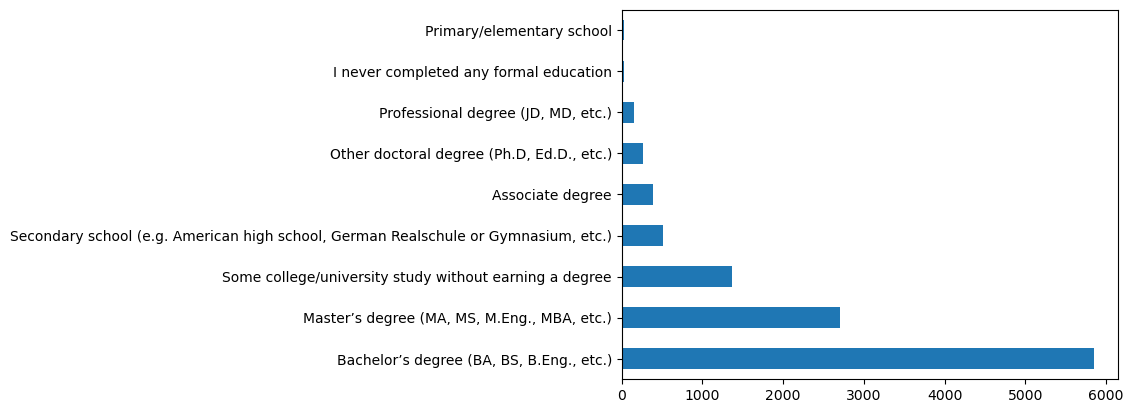

In [98]:
ed_level.plot(kind='barh')

In [105]:
Under_major = data['UndergradMajor'].value_counts()
Under_major

Computer science, computer engineering, or software engineering          6953
Information systems, information technology, or system administration     794
Another engineering discipline (ex. civil, electrical, mechanical)        759
Web development or web design                                             410
A natural science (ex. biology, chemistry, physics)                       403
Mathematics or statistics                                                 372
A business discipline (ex. accounting, finance, marketing)                244
A social science (ex. anthropology, psychology, political science)        210
A humanities discipline (ex. literature, history, philosophy)             207
Fine arts or performing arts (ex. graphic design, music, studio art)      161
I never declared a major                                                  124
A health science (ex. nursing, pharmacy, radiology)                        24
Name: UndergradMajor, dtype: int64

<AxesSubplot:ylabel='UndergradMajor'>

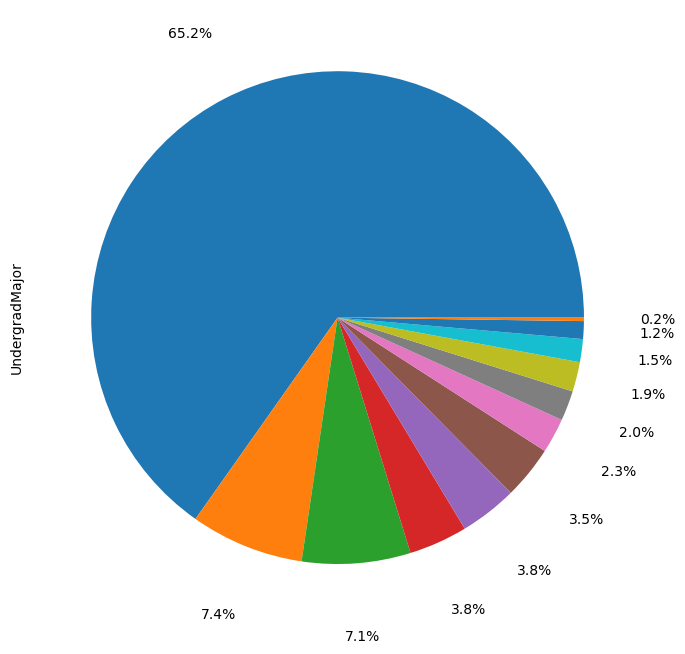

In [149]:
plt.figure(figsize=(10,8))

Under_major.plot(kind='pie',
                labels=None,
                autopct='%1.1f%%',
                pctdistance = 1.3)



In [ ]:
-DevType
-YearsCode

In [156]:
data['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                           1472
Developer, back-end                                                                                                                                                                                                                                                                              752
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                                                   446
Developer, back-end;Developer, full-stack                                                                                

In [157]:
data['YearsCode'].value_counts()

10                  1006
6                    842
8                    830
5                    783
7                    775
15                   615
12                   573
20                   555
4                    535
9                    502
3                    437
14                   359
11                   354
13                   332
18                   319
2                    270
16                   267
17                   228
25                   221
30                   173
22                   159
19                   156
23                   121
24                   113
21                    94
35                    90
1                     81
26                    65
27                    61
32                    60
28                    56
33                    50
40                    45
37                    43
34                    40
38                    34
29                    29
31                    27
36                    23
39                    22


In [159]:
data['ConvertedComp'].max()

2000000.0

In [166]:
max_comp = data[data['ConvertedComp'] == 2000000.0]

In [168]:
max_comp.shape

(138, 70)

In [169]:
data['ConvertedComp'].min()

0.0

In [172]:
data['ConvertedComp'].median()

57745.0

In [171]:
data.groupby(by='ConvertedComp').size()

ConvertedComp
0.0           26
4.0            1
5.0            1
10.0           2
46.0           1
            ... 
1848000.0      2
1850000.0      1
1860000.0      1
1980000.0      1
2000000.0    138
Length: 3515, dtype: int64

In [175]:
Highearning_data = data[data['ConvertedComp'] > 100000]
Highearning_data.shape

(2557, 70)

Age

<AxesSubplot:ylabel='Frequency'>

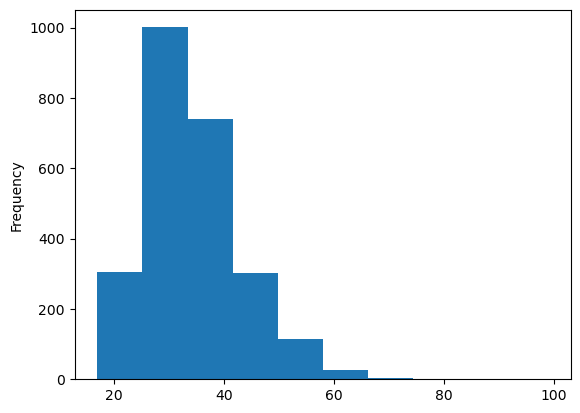

In [177]:
Highearning_data['Age'].plot(kind='hist')

In [204]:
Highearning_data['Age'].max()

99.0

In [205]:
Highearning_data['Age'].min()

17.0

In [206]:
Highearning_data['Age'].mean()

34.296147672552166

Gender

In [207]:
Gender_high = Highearning_data['Gender'].value_counts()
Gender_high 

Man                                                        2357
Woman                                                       155
Non-binary, genderqueer, or gender non-conforming            17
Woman;Non-binary, genderqueer, or gender non-conforming       5
Man;Non-binary, genderqueer, or gender non-conforming         5
Woman;Man                                                     1
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

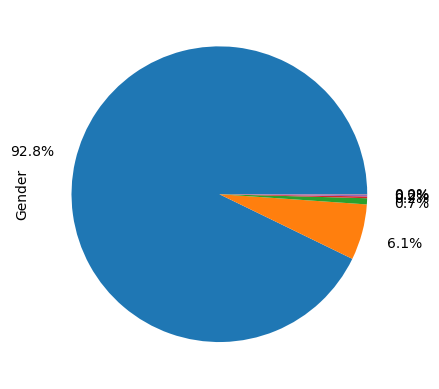

In [186]:
Gender_high.plot(kind='pie',
                 labels=None,
                autopct='%1.1f%%',
                pctdistance = 1.3)

Educational level

In [193]:
Ed_high = Highearning_data['EdLevel'].value_counts()
Ed_high

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              1380
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                            607
Some college/university study without earning a degree                                 303
Other doctoral degree (Ph.D, Ed.D., etc.)                                               86
Associate degree                                                                        79
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)      64
Professional degree (JD, MD, etc.)                                                      16
I never completed any formal education                                                   7
Primary/elementary school                                                                2
Name: EdLevel, dtype: int64

<AxesSubplot:ylabel='EdLevel'>

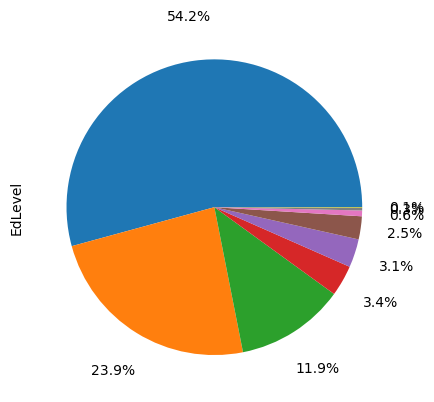

In [192]:
Ed_high.plot(kind='pie',
            labels=None,
                autopct='%1.1f%%',
                pctdistance = 1.3)

In [195]:
Highearning_data['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          1561
Information systems, information technology, or system administration     160
Another engineering discipline (ex. civil, electrical, mechanical)        158
A natural science (ex. biology, chemistry, physics)                       119
Mathematics or statistics                                                 104
A humanities discipline (ex. literature, history, philosophy)              69
A social science (ex. anthropology, psychology, political science)         66
A business discipline (ex. accounting, finance, marketing)                 60
Fine arts or performing arts (ex. graphic design, music, studio art)       54
Web development or web design                                              52
I never declared a major                                                   38
A health science (ex. nursing, pharmacy, radiology)                         7
Name: UndergradMajor, dtype: int64

In [ ]:
-EdLevel
-UndergradMajor
-DevType
-YearsCode
-Age
-Gender

In [208]:
Top_10 = Highearning_data['YearsCode'].value_counts().head(10)
Top_10

20    213
10    179
15    135
12    127
8     125
6     121
7     120
9      97
14     97
18     95
Name: YearsCode, dtype: int64

<AxesSubplot:>

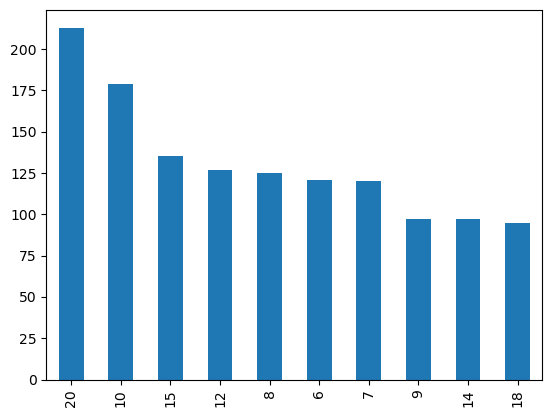

In [203]:
Top_10.plot(kind='bar')

In [217]:
new = Highearning_data[['CodeRev', 'YearsCode']]
new.value_counts()

CodeRev                                  YearsCode       
Yes, because I see value in code review  20                  173
                                         10                  156
                                         12                  109
                                         15                  109
                                         8                    97
                                                            ... 
No                                       45                    1
                                         47                    1
Yes, because I see value in code review  42                    1
                                         Less than 1 year      1
No                                       1                     1
Length: 126, dtype: int64

In [226]:
Highearning_data_corr = Highearning_data[['Age', 'ConvertedComp']].corr()
Highearning_data_corr

,Age,ConvertedComp
Age,1.000000,-0.119474
ConvertedComp,-0.119474,1.000000


import seaborn as sns

<AxesSubplot:>

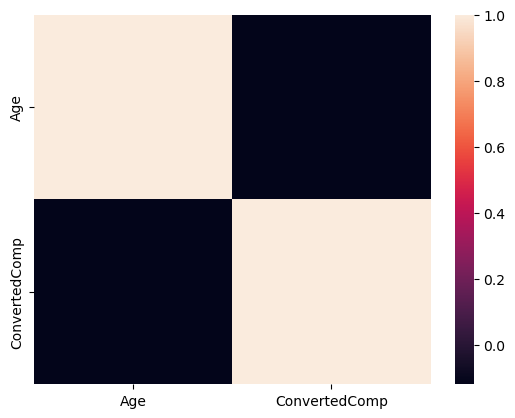

In [227]:
sns.heatmap(Highearning_data_corr)

In [222]:
Highearning_data_corr.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.162878,0.168034,0.148541,0.173563,0.156720,0.140817
std,0.410127,0.407731,0.420350,0.405054,0.413652,0.423537
min,-0.011102,-0.014742,-0.119474,-0.011102,-0.038293,-0.119474
25%,-0.006699,0.000125,-0.021206,0.003311,-0.024287,-0.030752
50%,-0.001611,0.001448,0.008932,0.014759,-0.007773,-0.003283
75%,-0.000410,0.015635,0.020316,0.021292,0.016021,0.007318
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [229]:
Highearning_data['ConvertedComp'].max()

2000000.0

In [230]:
Highearning_data['ConvertedComp'].min()

100010.0